# How to Choose the Number of Clusters

## Import the relevant libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [7]:
data = pd.read_csv("Countries-exercise.csv")
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


## Plot the data

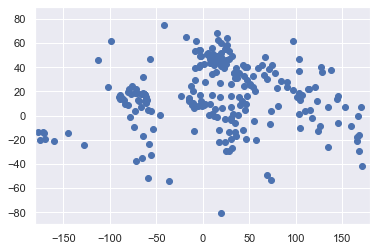

In [10]:
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the features

In [11]:
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

In [12]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering results

In [14]:
clusters_found = kmeans.fit_predict(x)
clusters_found

array([2, 3, 3, 2, 0, 0, 0, 3, 2, 3, 2, 3, 1, 3, 2, 1, 0, 3, 3, 0, 0, 0,
       1, 0, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 3, 3, 0, 2, 1, 0, 3,
       3, 3, 2, 2, 3, 0, 2, 2, 2, 2, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 3, 3,
       0, 0, 3, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2,
       1, 2, 1, 3, 2, 0, 2, 0, 1, 0, 3, 1, 3, 0, 3, 3, 0, 3, 0, 2, 0, 3,
       1, 3, 3, 3, 3, 1, 2, 2, 1, 0, 3, 1, 3, 0, 0, 2, 0, 3, 3, 0, 0, 0,
       1, 2, 0, 0, 0, 3, 3, 2, 1, 0, 0, 0, 1, 0, 1, 1, 3, 0, 2, 3, 3, 1,
       3, 1, 0, 1, 0, 2, 2, 0, 0, 3, 1, 1, 3, 3, 2, 2, 2, 1, 1, 1, 0, 2,
       1, 0, 2, 3, 2, 3, 0, 1, 3, 0, 3, 3, 3, 0, 1, 2, 0, 1, 0, 2, 0, 3,
       3, 2, 0, 3, 2, 0, 0, 0, 3, 2, 3, 3, 2, 3, 0, 1, 3, 3, 1, 2, 2, 0,
       0, 1, 3, 3, 0, 2, 2, 3, 0, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 3])

In [15]:
data["Cluster"] = clusters_found
data

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,2
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


## Plot the data

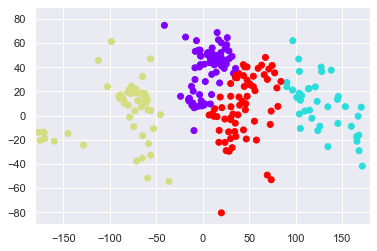

In [16]:
plt.scatter(data["Longitude"], data["Latitude"], c=data["Cluster"], cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting the number of clusters

### WCSS

In [18]:
kmeans.inertia_

256573.08675934302

In [26]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [27]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.08675934302,
 192194.9829002524,
 151462.83793490715,
 126758.35414179866,
 102873.2526445741,
 84967.41720068289,
 78669.5132749103]

### The Elbow Method

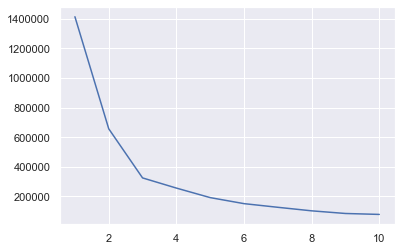

In [28]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)

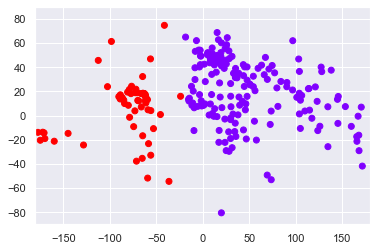

In [24]:
#for 2 clusters
kmeans = KMeans(2)
kmeans.fit(x)
clusters_found = kmeans.fit_predict(x)
data["Cluster"] = clusters_found
plt.scatter(data["Longitude"], data["Latitude"], c=data["Cluster"], cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

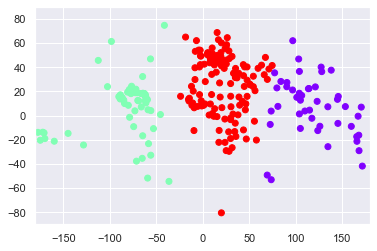

In [25]:
#for 3 clusters
kmeans = KMeans(3)
kmeans.fit(x)
clusters_found = kmeans.fit_predict(x)
data["Cluster"] = clusters_found
plt.scatter(data["Longitude"], data["Latitude"], c=data["Cluster"], cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()